# Fourier tempogram
The idea behind the Fourier-based tempogram is to detect local periodicities by comparing the novelty function with windowed sinusoids. We need to compute correlation between a section of the novelty function and the windowed sinusoid.
High correlation indicates a periodicity of the sinusoids frequency. To compute this correlation, we can use short-time Fourier transform (STFT).

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import librosa.display
from RhythmRecognition.constants import *
import matplotlib as mpl
from RhythmRecognition.onset import energy
from RhythmRecognition.tempo import fourier

mpl.rcParams.update({'font.size': 16})

audiofile = "../audio_files/spark.wav"


## Compute novelty function
Before computing the tempogram, we need to compute a novelty function of the audio signal. We will use the energy-based novelty function.

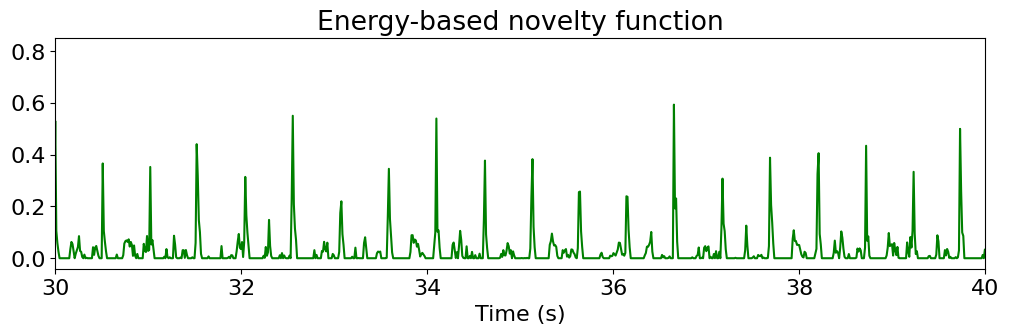

In [14]:
novelty_function = energy.EnergyNovelty(audiofile)
novelty_function = novelty_function.get()

frames = np.arange(len(novelty_function))
t = librosa.frames_to_time(frames, sr=SAMPLING_RATE, hop_length=HOP_LENGTH)


plt.figure(figsize=(12, 3))
plt.plot(t, novelty_function, 'green')
plt.xlim(30, 40)
plt.xlabel("Time (s)")
plt.title("Energy-based novelty function")
plt.show()

## Compute tempogram
After computing a novelty function, we can compute the Fourier-based tempogram.

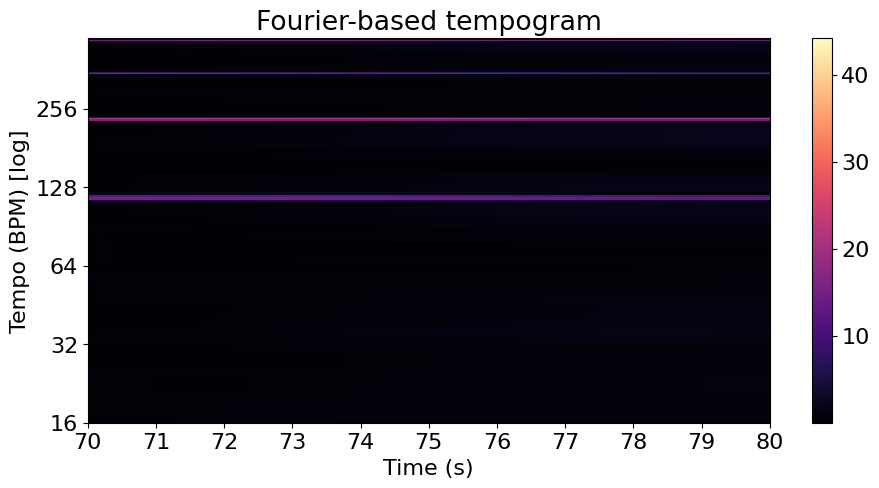

In [15]:
fourier_tempogram = fourier.FourierTempogram(novelty_function)
tempogram = fourier_tempogram.get_tempogram()

plt.figure(figsize=(11, 5))
librosa.display.specshow(tempogram, x_axis='time', y_axis='fourier_tempo', sr=SAMPLING_RATE, cmap='magma')
plt.xlabel("Time (s)")
plt.ylabel("Tempo (BPM) [log]")
plt.xlim(70, 80)
plt.colorbar()
plt.title("Fourier-based tempogram")
plt.show()

Then, we can extract the most dominant tempo from the tempogram (correct value is 117 BPM).

In [16]:
tempo = fourier_tempogram.get_tempo()
print("Tempo:", tempo, "BPM")

Tempo: 117 BPM


For better visualization of dominant tempi, we can also sum up the Fourier tempogram for each BPM value and inspect this function. A higher value indicates a more dominant tempo.

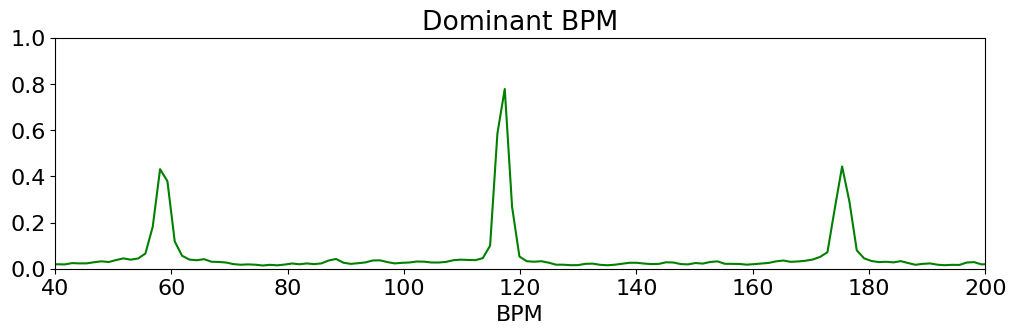

In [17]:
sum_of_tempos = np.sum(tempogram.T, axis=0)
sum_of_tempos /= max(sum_of_tempos)
bpm_values = librosa.fourier_tempo_frequencies(sr=SAMPLING_RATE, win_length=FRAME_LENGTH*2, hop_length=HOP_LENGTH)

plt.figure(figsize=(12, 3))
plt.plot(bpm_values[:len(sum_of_tempos)], sum_of_tempos, color='green')
plt.xlabel('BPM')
plt.xlim(40, 200)  # show only subset of tempi, because this is the interval where tempo is taken from
plt.ylim(0, 1)
plt.title("Dominant BPM")
plt.show()